In [2]:
import sys
import math
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

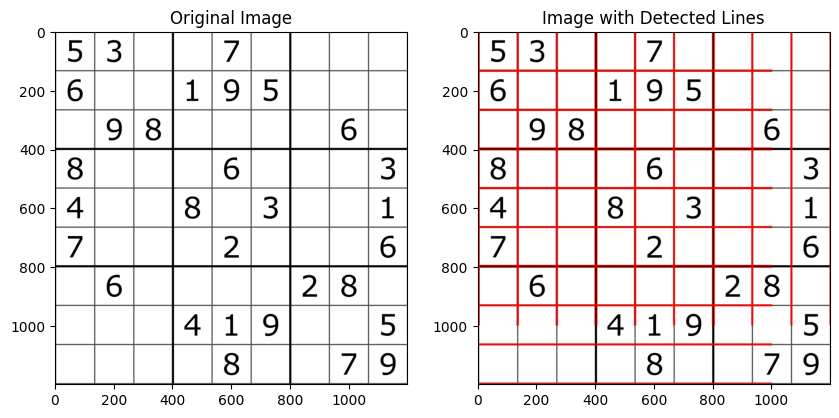

In [11]:


img = cv2.imread('./image/sudoku.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
img_with_lines = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Lines')
plt.show()


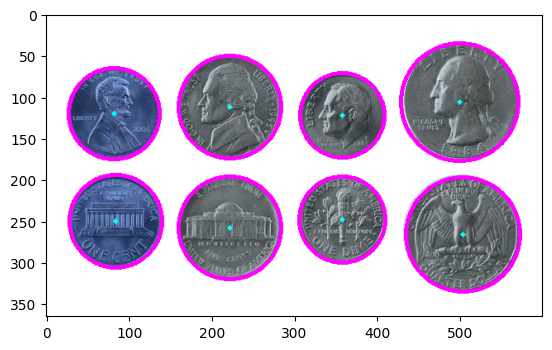

In [64]:
img = cv2.imread('./image/coins.jpg' , cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
img = cv2.imread('./image/coins.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=50, param2=30,
                           minRadius=50, maxRadius=80)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(img, center, 1, (0, 300, 300), 3)
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)
plt.imshow(img)